# Machine learning - classifier example

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('data/titanic_train.csv')
test_data  = pd.read_csv('data/titanic_test.csv')

In [3]:
train_data[ train_data.columns[[1,2,4,5]]].head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Create a new (smaller) data frame -- note the `.copy()`

In [4]:
D = train_data[['Sex', 'Age', 'Pclass', 'Survived']].copy()
D.head()

,Sex,Age,Pclass,Survived
0,male,22.0,3,0
1,female,38.0,1,1
2,female,26.0,3,1
3,female,35.0,1,1
4,male,35.0,3,0


For sex, set female == 1 (True) and male == 0 (False)

In [5]:
D['Sex'] = D['Sex'] == 'female'

In [6]:
D.head()

,Sex,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


check if there are NaN values

In [7]:
D = D.dropna()

Convert data to numpy arrays (sklearn expects this)

In [8]:
D_np = D.astype(np.int32).values
D_np

array([[ 0, 22,  3,  0],
       [ 1, 38,  1,  1],
       [ 1, 26,  3,  1],
       ..., 
       [ 1, 19,  1,  1],
       [ 0, 26,  1,  1],
       [ 0, 32,  3,  0]], dtype=int32)

In [9]:
X = D_np[:,:-1]     # the first N columns of D_np
Y = D_np[:,-1]      # the last column of D_np

Survival as a function of age:

In [10]:
female = D['Sex'] == 1
survived = Y == 1
age = X[:,1]

Visualize the distribution

In [11]:
b = np.arange(0,81,5)
b

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

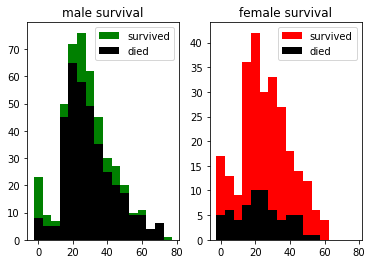

In [12]:
b = np.arange(0,81,5)

S = {'male'   : np.histogram(age[ survived & ~female], bins=b)[0],
     'female' : np.histogram(age[ survived &  female], bins=b)[0]
    }

D = {'male'   : np.histogram(age[~survived & ~female], bins=b)[0],
     'female' : np.histogram(age[~survived &  female], bins=b)[0]
    }

b = b[:-1]
for i,sex,c in zip((0,1), ('male','female'), ('green', 'red')):
    plt.subplot(121+i)
    plt.bar(b, S[sex], bottom=D[sex],color=c,width=5,label='survived')
    plt.bar(b, D[sex], color='k', width=5, label='died')
    plt.title(sex + ' survival')
    plt.legend()

Use Logistic Regression classifier

In [13]:
X_train, X_test, Y_train, Y_test = cv.train_test_split(X,Y,test_size=0.05)

logreg = lm.LogisticRegression()

logreg.fit(X_train, Y_train)

y_predict = logreg.predict(X_test)

([], <a list of 0 Text yticklabel objects>)

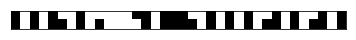

In [14]:
plt.imshow(np.vstack((Y_test, y_predict)), interpolation='none', cmap='bone')

plt.xticks([]); plt.yticks([])

In [15]:
cv.cross_val_score(logreg, X, Y)

array([ 0.78661088,  0.78991597,  0.78059072])